In [2]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from skopt.plots import plot_convergence, plot_evaluations, plot_objective

boston = load_boston()
X, y = boston.data, boston.target
n_features = X.shape[1]

# gradient boosted trees tend to do well on problems like this
reg = GradientBoostingRegressor(n_estimators=50, random_state=0)

from skopt.space import Real, Integer
from skopt.utils import use_named_args


# The list of hyper-parameters we want to optimize. For each one we define the bounds,
# the corresponding scikit-learn parameter name, as well as how to sample values
# from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(1, 5, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set scikit-learn
# estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X, y, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize, forest_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)
res_forest = forest_minimize(objective, space, n_calls=50, random_state=0)

In [3]:
print(res_gp)

          fun: 2.916270664896858
    func_vals: array([3.35876092, 7.17248184, 6.66947692, 7.07496098, 3.5710317 ,
       6.17062494, 3.67680131, 7.1996609 , 3.58924549, 7.08885636,
       3.37300448, 3.31341838, 4.15922161, 3.39672299, 4.64687591,
       3.40229343, 5.30910731, 3.29761965, 3.93407231, 3.29549156,
       3.37484815, 3.41431689, 3.06938847, 3.16772197, 3.17004328,
       3.13846347, 3.75326032, 3.07502295, 3.21237003, 3.40253907,
       3.16777136, 2.93206642, 3.03839951, 3.10872518, 2.91627066,
       3.08095969, 3.06390793, 3.78271502, 7.22293887, 7.22406888,
       3.91074443, 3.02333656, 3.84454954, 4.4974978 , 3.07764719,
       3.08618593, 3.08640065, 3.06801024, 3.02078447, 3.04887973])
       models: [GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * Matern(length_scale=[1, 1, 1, 1, 1], nu=2.5) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=2, noise='gaussian',
                         no

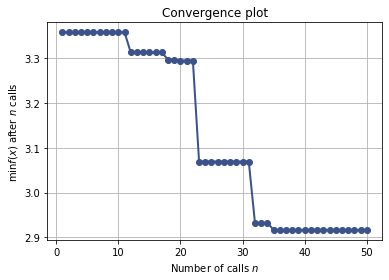

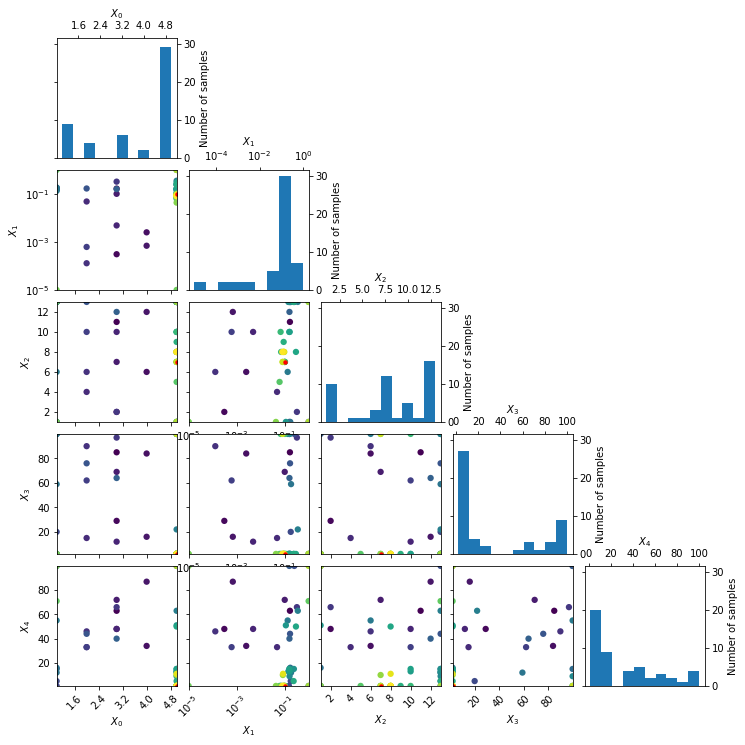

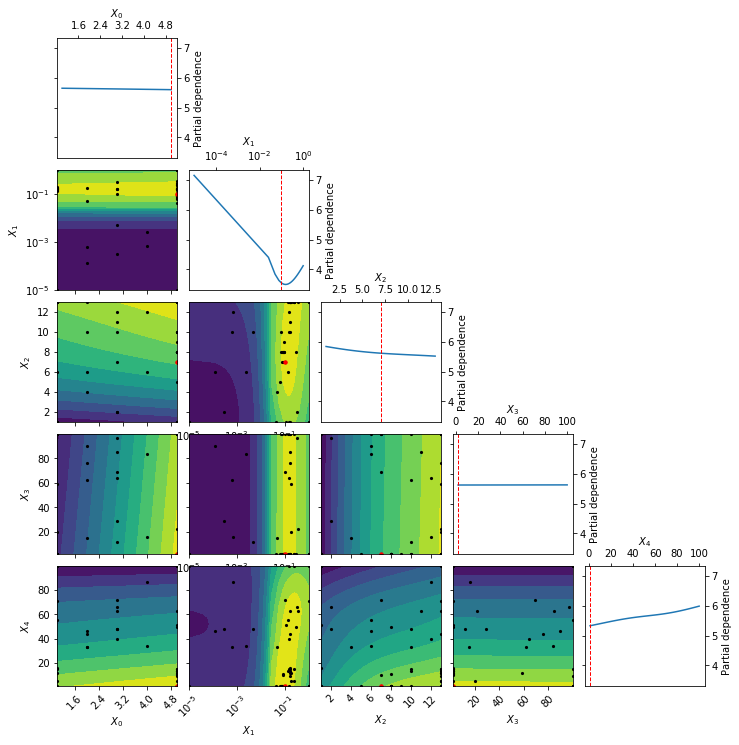

In [5]:
_ = plot_convergence(res_gp)
_ = plot_evaluations(res_gp, bins=10)
_ = plot_objective(res_gp)

In [6]:
print(res_forest)

          fun: 2.9472684949300985
    func_vals: array([6.13626046, 6.93384188, 7.06302892, 7.07276715, 5.95734212,
       3.4539452 , 4.18314967, 6.76699032, 6.63308125, 7.21448353,
       3.35411358, 3.41092136, 3.18880748, 3.57845123, 3.24738562,
       3.4649251 , 3.2414404 , 3.20720514, 2.94726849, 3.07367782,
       3.10008214, 3.22337994, 3.11896689, 3.87102787, 3.0379525 ,
       2.96504612, 3.48434301, 3.42621353, 3.17000459, 3.09721635,
       2.97608822, 3.17997493, 3.22292382, 3.33237616, 3.75332049,
       4.59569078, 3.07065107, 3.85544893, 3.2721231 , 3.3172909 ,
       3.05646198, 3.34307347, 3.10920186, 3.4211901 , 3.24543856,
       3.23040692, 3.16107607, 3.15542943, 3.46457362, 3.07164458])
       models: [ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_samples_leaf=3, min_samples_split=2, min_variance=0.0,
                    min_weight_fraction_leaf=0.0, n_e

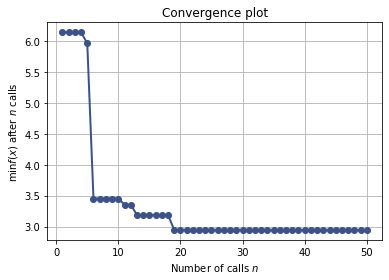

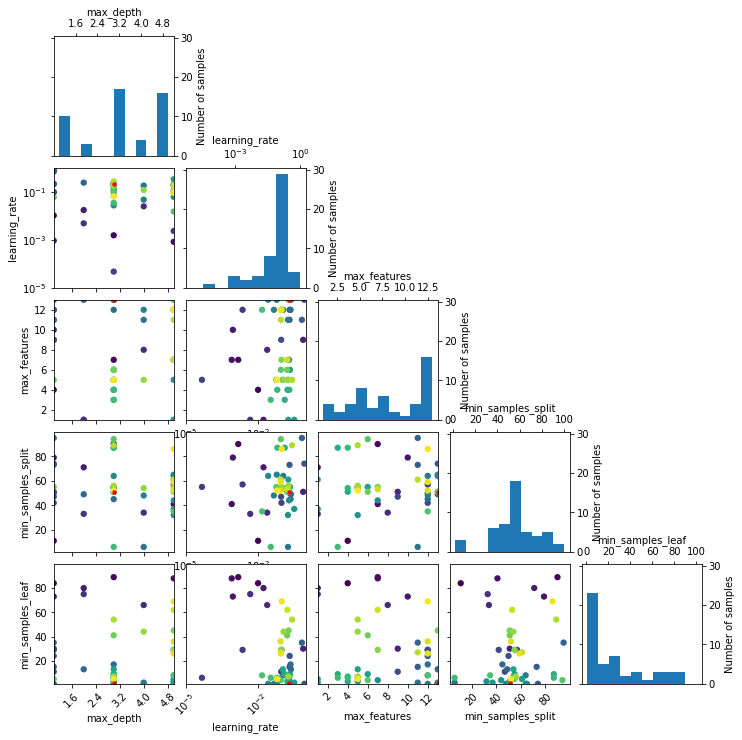

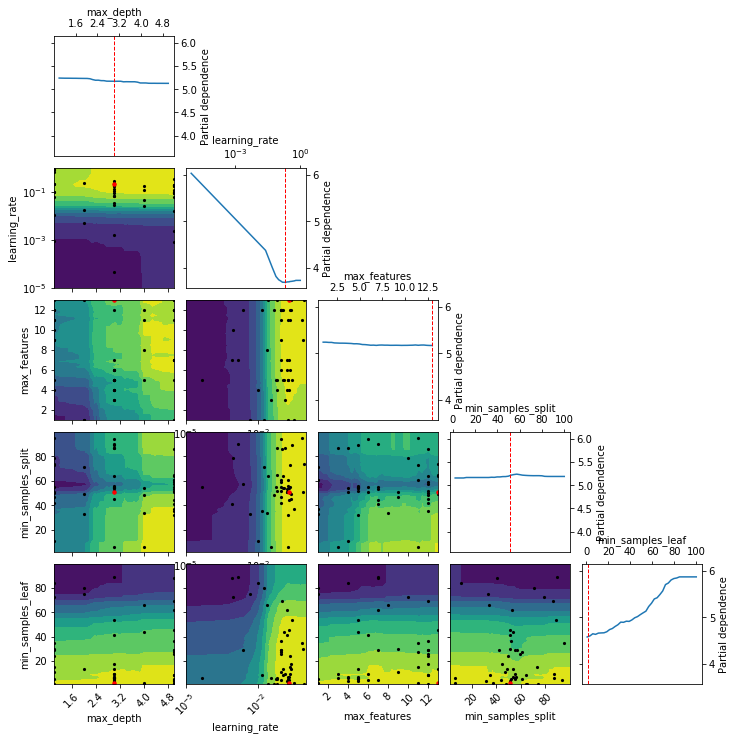

In [7]:
_ = plot_convergence(res_forest)
_ = plot_evaluations(res_forest, bins=10)
_ = plot_objective(res_forest)

# CORNER PLOT

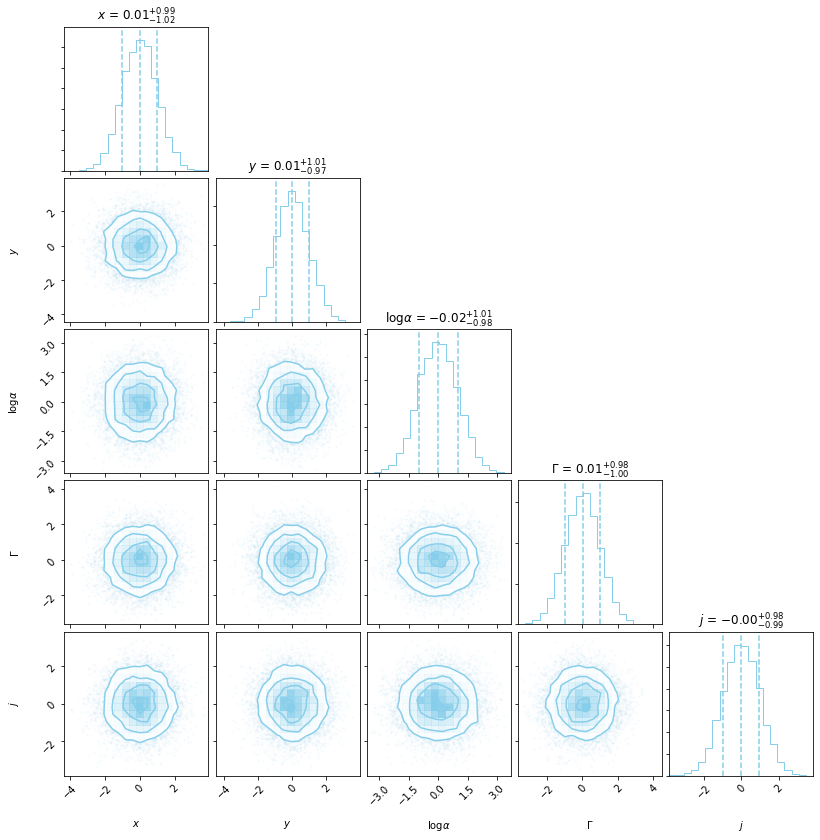

In [8]:
# !pip install corner
import corner
import numpy as np

ndim, nsamples = 5, 10000
np.random.seed(42)
samples = np.random.randn(ndim * nsamples).reshape([nsamples, ndim])

figure = corner.corner(samples, labels=[r"$x$", r"$y$", r"$\log \alpha$", r"$\Gamma$", r"$j$"],
                       quantiles=[0.16, 0.5, 0.84],
                       color = "skyblue",
                       show_titles=True, title_kwargs={"fontsize": 12})